<a href="https://colab.research.google.com/github/kardecallan566/Trabalho-de-dados/blob/main/Trabalho_EDA_%C3%81nalise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analise de Interações no facebook

In [2]:
!pip -q install PySimpleGUI

     |████████████████████████████████| 509 kB 4.2 MB/s 


In [68]:
import PySimpleGUI as Kar
import numpy as kar
import random as dec
import networkx as nx
import matplotlib.pyplot as plt
import csv
import pandas as pd
%matplotlib inline

In [ ]:
Classe VERTICE

In [4]:
class Vertex:
    def __init__(self, x):
        self._elemento = x

    def __hash__(self):
        return hash(id(self))

    def __str__(self):
        return "{0}".format(self.elem())

    def __ne__(self, other):
        return self._elemento != other

    def __eq__(self, other):
        return self._elemento == other

    def __gt__(self, other):
        return self._elemento > other

    def __lt__(self, other):
        return self._elemento < other

    def __le__(self, other):
        return self._elemento <= other

    def __ge__(self, other):
        return self._elemento >= other

    def elem(self):
        return self._elemento

Classe ARESTA

In [5]:
class edge:
    def __init__(self, u, v, p):
        self._origem = u
        self.destino = v
        self.peso = p

    def __hash__(self):
        return hash((self._origem, self.destino))

    def __str__(self):
        return "{0},{1}".format(self._origem, self.destino)

    def endpoints(self):
        return (self._origem, self.destino)

    def opposite(self, v):
        return self.destino if v is self._origem else self._origem

    def element(self):
        return self.peso

    def mostra_edge(self):
        print('(', self._origem, ', ', self.destino, ')')
    # def __ne__(self, other):
    #     return self._elemento != other

    def __eq__(self, other):
        return self._origem == other._origem and self.destino == other.destino

    def __gt__(self, other):
        return self.element() > other.element()

    def __lt__(self, other):
        return self.element() < other.element()

    def __le__(self, other):
        return self.element() <= other.element()

    def __ge__(self, other):
        return self.element() >= other.element()

    def __del__(self):
        return None

Classe GRAFO

In [6]:
class Graph_cc:
    def __init__(self, directed=False):
        self._directed = directed
        self._number = 0
        self._vertices = {}

    def insert_vertex(self, x=None):
        v = Vertex(x)
        self._vertices[v] = {}
        return v

    def insert_edge(self, u, v, x=None):
        e = edge(u, v, x)
        self._vertices[u][v] = e
        self._vertices[v][u] = e

    def incident_edges(self, v, outgoing=True):
        for edge in self._vertices[v].values():
            if not self._directed:
                yield edge
            else:
                x, y = edge.endpoints()
                if (outgoing and x == v) or (not outgoing and y == v):
                    yield edge

    def is_directed(self):
        return self._directed

    def vertex_count(self):
        return self._number

    def vertices(self):
        return self._vertices.keys()

    def edge_count(self):
        total = sum(len(self._vertices[v]) for v in self._vertices)
        return total if self._directed else total // 2

    def edges(self):
        result = set()
        for secondary_map in self._vertices.values():
            result.update(secondary_map.values())
        return result

    def get_edge(self, u, v):
        edge = self._vertices[u].get(v)
        if edge != None:
            _, x = edge.endpoints()
            if x != v:
                edge = None
        return edge

    def degree(self, v, outgoing=True):
        adj = self._vertices
        if not self._directed:
            count = len(adj[v])
        else:
            count = 0
            for edge in adj[v].values():
                x, y = edge.endpoints()
                if (outgoing and x == v) or (not outgoing and y == v):
                    count += 1
        return count

    def remove_edge(self, u, v):
        if u in self._vertices.keys() and v in self._vertices[u].keys():
            del self._vertices[u][v]
            del self._vertices[v][u]

    def remove_vertex(self, v):
        lst = [i for i in self.incident_edges(v)]
        for i in lst:
            x, y = i.endpoints()
            self.remove_edge(x, y)
        del self._vertices[v]
        return v

    def Kruska(self):
        Nodo = {}
        resultado = []

        def Make_set(vertex):
            Nodo[vertex] = vertex

        def Find_set(vertex):
            if Nodo[vertex] != vertex:
                Nodo[vertex] = Find_set(Nodo[vertex])
            return Nodo[vertex]

        def Union(u, v, Ordenada):
            Dato1 = Find_set(u)
            Dato2 = Find_set(v)
            if Dato1 != Dato2:
                for Dato in Ordenada:
                    Nodo[Dato1] = Dato2

        for i in self.vertices():
            Make_set(i)
        ordenado = sorted(self.edges())
        for Dato in ordenado:
            u, v = Dato.endpoints()
            if Find_set(u) != Find_set(v):
                resultado.append(Dato)
                Union(u, v, ordenado)
        return resultado

    def clustering(self,h):
        lista = []
        for i in range(h):
            if len(self.edges()) > 0:
                ordenado = sorted(self.edges())
                u, v = ordenado[-1].endpoints()
                lista.append(ordenado[-1])
                self.remove_edge(u,v)
        return lista
    def clustering_2(self):
        maior  = []
        for j in self.edges():
            if len(maior) == 0:
                u, v = j.endpoints()
                maior.append(u)
            u,v = j.endpoints()
            if self.degree(v) > self.degree(u):
                if self.degree(maior[0]) < self.degree(v):
                    maior[0] = v
            else:
                if self.degree(maior[0]) < self.degree(u):
                    maior[0] = u
        return maior


In [7]:
class Face:
    def __init__(self):
        Kar.theme("DarkGreen4")
        self.gra = Graph_cc()
        self.net = nx.Graph()
        self.Tela_1, self.Tela_2,self.Tela_3,self.Tela_4,self.Tela_5, self.Tela_6,self.Tela_7,self.Tela_8,self.Tela_9, self.Tela_10 = self.inicial(), None, None, None, None, None, None, None, None, None
        while True:
            window, eventos, values = Kar.read_all_windows()
            if window == self.Tela_1 and eventos == Kar.WIN_CLOSED:
                break
            if window == self.Tela_2 and eventos == Kar.WIN_CLOSED:
                break
            if window == self.Tela_3 and eventos == Kar.WIN_CLOSED:
                break
            if window == self.Tela_4 and eventos == Kar.WIN_CLOSED:
                break
            if window == self.Tela_5 and eventos == Kar.WIN_CLOSED:
                break
            if window == self.Tela_6 and eventos == Kar.WIN_CLOSED:
                break
            if window == self.Tela_7 and eventos == Kar.WIN_CLOSED:
                break
            if window == self.Tela_8 and eventos == Kar.WIN_CLOSED:
                self.Tela_8.hide()
                self.Tela_1.un_hide()
            if window == self.Tela_9 and eventos == Kar.WIN_CLOSED:
                break
            if window == self.Tela_10 and eventos == Kar.WIN_CLOSED:
                break
            if window == self.Tela_1 and eventos == '001_O':
                self.Tela_2 = self.tl_grafo()
                self.Tela_1.hide()
            if window == self.Tela_1 and eventos == '003_O':
                if len(self.gra._vertices) >= 0:
                    self.Tela_3 = self.tl_matriz()
                    self.Tela_1.hide()
                    c = kar.zeros((10,3), 'U10')
                    # with open('Code_Vag/Data_Facebook_2.csv', 'r', encoding='utf-8') as base:
                    #     tab = csv.reader(base, delimiter=',')
                    #     for i in tab:
                    #         self.lin(f'{i}')
                        #     pass
                    #     #     # for i in range(9):
                    #     #     #     for j in range(3):
                    #     #     #         c[i][j] = rar.choice(grafo["A"])
                    #     #print(a)
                else:
                    Kar.popup('Grafo vazio, insira vertices e arestas')
            if window == self.Tela_2 and eventos =='004_O':
                self.Tela_4 = self.tl_insert_vert()
                self.Tela_2.hide()
            if window == self.Tela_5 and eventos == '021_O':
                self.Tela_5.hide()
                self.Tela_2.un_hide()
            if window == self.Tela_3 and eventos == '014_O':
                self.Tela_3.hide()
                self.Tela_1.un_hide()
            if window == self.Tela_2 and eventos == '005_O':
                self.Tela_5 = self.tl_insert_edg()
                self.Tela_2.hide()
            if window == self.Tela_4 and eventos == '018_O':
                self.Tela_6 = self.tl_random()
                self.Tela_4.hide()
            if window == self.Tela_2 and eventos == '010_O':
                self.Tela_7 = self.tl_degree()
                self.Tela_2.hide()
            if window == self.Tela_4 and eventos == '017_O':
                if len(values['015_O']) > 0 :
                    self.gra.insert_vertex(values['015_O'])
                    self.Tela_4.hide()
                    Kar.popup('Vertice adicionado com Sucesso', font=('Times',13), icon='correct')
                    self.Tela_2.un_hide()
                else:
                    Kar.popup_error('insira algum valor no campo', font=('Times',13), icon='correct')
            if window == self.Tela_4 and eventos == '016_O':
                self.Tela_4.hide()
                self.Tela_2.un_hide()
            if window == self.Tela_5 and eventos == '022_O':
                if len(values['019_O']) > 0 and len(values['020_O']) > 0:
                    if values['019_O'][0].__hash__() != values['020_O'][0].__hash__():
                        if values['001_P'].isdecimal():
                            self.gra.insert_edge(values['019_O'][0],values['020_O'][0],values['001_P'])
                            self.net.add_edge(values['019_O'][0].elem(),values['020_O'][0].elem(),weight=int(values['001_P']))
                            Kar.popup('Edge adicionado com Sucesso', font=('Times',13), icon=Kar.EMOJI_BASE64_HAPPY_LAUGH)
                            self.Tela_5.hide()
                            self.Tela_2.un_hide()
                        else:
                            Kar.popup_error('O Peso deve ser um valor Numerico', font=('Times', 13), icon='correct')
                    else:
                        Kar.popup_error('Os vertices devem ser diferentes', font=('Times', 13), icon='correct')
                else:
                    Kar.popup_error('Selecione dois Vertices', font=('Times',13), icon='correct')
            if window == self.Tela_2 and eventos == '006_O':
                self.Tela_2.hide()
                Kar.popup(f'Quantidade de Vertices: {len(self.gra._vertices.keys())}')
                self.Tela_2.un_hide()
            if window == self.Tela_2 and eventos == '007_O':
                self.Tela_2.hide()
                Kar.popup(f'Quantidade de arestas: {self.gra.edge_count()}')
                self.Tela_2.un_hide()
            if window == self.Tela_6 and eventos == '023_O':
                rand = 0
                if values['001_ran']:
                    rand = 10
                    for i in range(rand):
                        self.gra.insert_vertex(dec.randint(0, values['001_lid']))
                    Kar.popup('Vertice adicionado com Sucesso', font=('Times', 13), icon=Kar.EMOJI_BASE64_HAPPY_LAUGH)
                elif values['002_ran']:
                    rand = 100
                    for i in range(rand):
                        self.gra.insert_vertex(dec.randint(0, values['001_lid']))
                    Kar.popup('Vertice adicionado com Sucesso', font=('Times', 13), icon=Kar.EMOJI_BASE64_HAPPY_LAUGH)
                elif values['003_ran']:
                    rand = 1000
                    for i in range(rand):
                        self.gra.insert_vertex(dec.randint(0, values['001_lid']))
                    Kar.popup('Vertice adicionado com Sucesso', font=('Times', 13), icon=Kar.EMOJI_BASE64_HAPPY_LAUGH)
                elif values['004_ran']:
                    rand = 15
                    for i in range(rand):
                        self.gra.insert_vertex(dec.randint(0, values['001_lid']))
                    Kar.popup('Vertice adicionado com Sucesso', font=('Times', 13), icon=Kar.EMOJI_BASE64_HAPPY_LAUGH)
                elif values['005_ran']:
                    rand = 150
                    for i in range(rand):
                        self.gra.insert_vertex(dec.randint(0, values['001_lid']))
                    Kar.popup('Vertice adicionado com Sucesso', font=('Times', 13), icon=Kar.EMOJI_BASE64_HAPPY_LAUGH)
                elif values['006_ran']:
                    rand = 1500
                    for i in range(rand):
                        self.gra.insert_vertex(dec.randint(0, values['001_lid']))
                    Kar.popup('Vertice adicionado com Sucesso', font=('Times', 13), icon=Kar.EMOJI_BASE64_HAPPY_LAUGH)
                else:
                    Kar.popup_error('Selecione algum valor', font=('Times', 13), icon='correct')
                self.Tela_6.hide()
                self.Tela_2.un_hide()
            if window == self.Tela_7 and eventos == '025_O':
                self.Tela_7.hide()
                self.Tela_2.un_hide()
            if window == self.Tela_7 and eventos == '026_O':
                if len(values['024_O'])>0:
                     self.text(f'{self.gra.degree(values["024_O"][0])}')
                else:
                    Kar.popup_error('Selecione algum valor', font=('Times', 13), icon='correct')
            if window == self.Tela_2 and eventos == '011_O':
                Kar.popup('Direcionado: {0}'.format(self.gra.is_directed()), font=('Times', 13), icon='correct')
            if window == self.Tela_1 and eventos == '002_O':
                self.Tela_8 = self.tl_visu()
                self.Tela_1.hide()
                fig = plt.figure(figsize=(7,7))
                ax = fig.add_subplot()
                pos = nx.random_layout(self.net)
                a = nx.get_edge_attributes(self.net, "weight")
                nx.draw_networkx_edge_labels(self.net,pos=pos,edge_labels=a)
                nx.draw(self.net, with_labels=True,pos=pos)
                plt.show()
                #fig_agg = self.draw_figure(self.Tela_8['001_S'].TKCanvas, fig)
                #fig_agg.draw()
            if window == self.Tela_2 and eventos == '001_R':
                self.Tela_2.hide()
                self.Tela_1.un_hide()
            if window == self.Tela_2 and eventos == '002_R':
                self.edg()
            if window == self.Tela_8 and eventos == '027_O':
                self.Tela_8.hide()
                self.Tela_1.un_hide()
            if window == self.Tela_2 and eventos == '001_PO':
                bo = self.gra.Kruska()
                self.net = nx.Graph()
                self.gra = Graph_cc()
                def list_vert():
                    lista_Vert = []
                    for i in bo:
                        u, v = i.endpoints()
                        if u not in lista_Vert:
                            lista_Vert.append(u)
                        if v not in lista_Vert:
                            lista_Vert.append(v)
                    return lista_Vert

                def inser_vert():
                    vertice = []
                    for i in list_vert():
                        vertice.append(self.gra.insert_vertex(i))
                    return vertice

                def iner_edge():
                    vertice = inser_vert()
                    for i in bo:
                        u, v = i.endpoints()
                        for j in vertice:
                            if u.elem() == j.elem():
                                for k in vertice:
                                    if v.elem() == k.elem():
                                        self.gra.insert_edge(j, k, i.element())
                                        self.net.add_edge(j, k, weight=i.element())

                iner_edge()
                pos = nx.random_layout(self.net)
                a = nx.get_edge_attributes(self.net, "weight")
                nx.draw_networkx_edge_labels(self.net, pos=pos, edge_labels=a)
                nx.draw(self.net, with_labels=True, pos=pos)
                plt.show()
            if window == self.Tela_2 and eventos == '003_R':
                item = Kar.popup_get_text('Digite o  numero de vezes que o Cluster vai rodar')
                a =self.gra.clustering(int(item))
                for i in a:
                    u,v = i.endpoints()
                    self.net.remove_edge(u, v)
                pos = nx.random_layout(self.net)
                a = nx.get_edge_attributes(self.net, "weight")
                nx.draw_networkx_edge_labels(self.net, pos=pos, edge_labels=a)
                nx.draw(self.net, with_labels=True,pos=pos )
                plt.show()
            if window == self.Tela_2 and eventos == '009_O':
                self.Tela_9 = self.tl_remove_ed()
                self.Tela_2.hide()
            if window == self.Tela_9 and eventos == '030_O':
                self.Tela_9.hide()
                self.Tela_2.un_hide()
            if window == self.Tela_9 and eventos == '031_O':
                if values["032_O"] != None:
                    u,v = values["032_O"][0].endpoints()
                    self.gra.remove_edge(u,v)
                    Kar.popup('Edge {0} Removido.'.format(values["032_O"][0].endpoints()), font=('Times', 13), icon=Kar.EMOJI_BASE64_HAPPY_LAUGH)
                    self.Tela_9.hide()
                    self.Tela_2.un_hide()
                else:
                    Kar.popup_error('Selecione algum valor', font=('Times', 13), icon='incorrect')
            if window == self.Tela_2 and eventos == '008_O':
                self.Tela_10 = self.tl_remove_vertic()
                self.Tela_2.hide()
            if window == self.Tela_10 and eventos == '035_O':
                if values["033_O"] != None:
                    self.gra.remove_vertex(values["033_O"][0])
                    Kar.popup('Vertice {0} Removido.'.format(values["033_O"][0]), font=('Times', 13), icon=Kar.EMOJI_BASE64_HAPPY_LAUGH)
                    self.Tela_10.hide()
                    self.Tela_2.un_hide()
                else:
                    Kar.popup_error('Selecione algum valor', font=('Times', 13), icon='incorrect')
            if window == self.Tela_10 and eventos == '034_O':
                self.Tela_10.hide()
                self.Tela_2.un_hide()

    def inicial(self):
        home = [
            [Kar.Button('Grafos', key='001_O', size=(18, 2), font=('Fantasy',15))],
            [Kar.Button('Visualizar Grafo', key='002_O', size=(18, 2), font=('Times',15))],
            [Kar.Button('Matriz do Grafo', key='003_O', size=(18, 2), font=('Times',15))],
        ]
        return Kar.Window('Home', home, auto_size_text=True, finalize=True, resizable=True,icon=Kar.EMOJI_BASE64_HAPPY_LAUGH)
    def tl_grafo(self):
        tela_grafo = [
            [Kar.VPush()],
            [Kar.Push(), Kar.Button('Insert_Vertex', key='004_O', size=(18, 2), font=('Times',15)), Kar.Push()],
            [Kar.Push(), Kar.Button('Insert_Edge', key='005_O', size=(18, 2), font=('Times',15)), Kar.Push()],
            [Kar.Push(), Kar.Button('Quantidade_Vertex', key='006_O', size=(18, 2), font=('Times',15)), Kar.Push()],
            [Kar.Push(), Kar.Button('Quantidade_Edge', key='007_O', size=(18, 2), font=('Times',15)), Kar.Push()],
            [Kar.Push(), Kar.Button('Remove_Vertex', key='008_O', size=(18, 2), font=('Times',15)), Kar.Push()],
            [Kar.Push(), Kar.Button('Remove_Edge', key='009_O', size=(18, 2), font=('Times',15)), Kar.Push()],
            [Kar.Push(), Kar.Button('Grau', key='010_O', size=(18, 2), font=('Times',15)), Kar.Push()],
            [Kar.Push(), Kar.Button('is directed', key='011_O', size=(18, 2), font=('Times',15)), Kar.Push()],
            [Kar.Push(), Kar.Button('vertices', key='012_O', size=(18, 2), font=('Times',15)), Kar.Push()],
            [Kar.Push(), Kar.Button('get edge', key='013_O', size=(18, 2), font=('Times',15)), Kar.Push()],
            [Kar.Push(), Kar.Button('Kruskal', key='001_PO', size=(18, 2), font=('Times', 15)), Kar.Push()],
            [Kar.Push(), Kar.Button('Ler_achi', key='002_R', size=(18, 2), font=('Times', 15)), Kar.Push()],
            [Kar.Push(), Kar.Button('remover', key='003_R', size=(18, 2), font=('Times', 15)), Kar.Push()],
            [Kar.Push(), Kar.Button('Voltar', key='001_R', size=(18, 2), font=('Times', 15)), Kar.Push()],
            [Kar.VPush()]
        ]
        return Kar.Window('Trabalho de programação', tela_grafo, auto_size_text=True, finalize=True, resizable=True,icon=Kar.EMOJI_BASE64_HAPPY_LAUGH)
    def tl_matriz(self):
        self.lin = Kar.Text('', font=('Times', 15))
        text_rows = [[self.lin for col in range(3)] for row in range(10)]
        headings = ['Vertice 1', 'Vertice 2', 'Peso']
        header = [[Kar.Text('  ')] + [Kar.Text(h, size=(14, 1)) for h in headings]]
        tela_matriz = [
            [Kar.VPush()],
            text_rows,
            [Kar.VPush()],
            [Kar.Button('Voltar', key='014_O', size=(18, 2), font=('Times',15)),Kar.VPush()]
             ]
        layout = header+text_rows+[[Kar.Button('Voltar', key='014_O', size=(18, 2), font=('Times',15)),Kar.VPush()]]
        return Kar.Window('Trabalho de programação', layout, auto_size_text=True, finalize=True, resizable=True)
    def tl_insert_vert(self):
        tela_inser = [
            [Kar.VPush()],
            [Kar.Push(),Kar.Text("Insira o Vertice", size=(19, 1), font=12),Kar.Input(key='015_O', font=('Times',15)),Kar.Push()],
            [Kar.VPush()],
            [Kar.Button('Voltar', key='016_O'),Kar.Push(),Kar.Button('Random_value', key='018_O'), Kar.Push(), Kar.Button('Adicionar', key='017_O')],
        ]
        return Kar.Window('Tela Programação', tela_inser, auto_size_text=True, finalize=True,resizable=True)
    def tl_insert_edg(self):
        a = [i for i in self.gra._vertices.keys()]
        tela_inser_ed = [
            [Kar.VPush()],
            [Kar.Push(),Kar.Listbox(values=[i for i in a], size=(30, 10),key='019_O'),Kar.Push()],
            [Kar.VPush()],
            [Kar.Push(),Kar.Listbox(values=[i for i in a], size=(30, 10),key='020_O'),Kar.Push()],
            [Kar.VPush()],
            [Kar.Push(), Kar.Text("Insira o Peso do edge", size=(19, 1), font=12),
             Kar.Input(key='001_P', font=('Times', 15)), Kar.Push()],
            [Kar.VPush()],
            [Kar.Button('Voltar', key='021_O'), Kar.Push(), Kar.Button('Adicionar', key='022_O',)],
        ]
        return Kar.Window('Tela Programação', tela_inser_ed, auto_size_text=True, finalize=True,resizable=True)

    def tl_random(self):
        tela_rando = [
            [Kar.VPush()],
            [Kar.Push(),Kar.Text('Escolha a quantidade de numero aléatorios a ser inserido',font=('Times',15)),Kar.Push()],
            [Kar.VPush()],
            [Kar.Push(), Kar.Radio('10', 'Group_1', font=('Times', 15), key='001_ran', ), Kar.Push(),
             Kar.Radio('100', 'Group_1', font=('Times', 15), key='002_ran'), Kar.Push(),
             Kar.Radio('1000', 'Group_1', font=('Times', 15), key='003_ran'), Kar.Push()],
            [Kar.VPush()],
            [Kar.Push(), Kar.Radio('15', 'Group_1', font=('Times', 15),key='004_ran'), Kar.Push(),
             Kar.Radio('150', 'Group_1', font=('Times', 15),key='005_ran'), Kar.Push(),
             Kar.Radio('1500', 'Group_1', font=('Times', 15),key='006_ran'), Kar.Push()],
            [Kar.VPush()],
            [Kar.Push(), Kar.Text('Escolha o range dos numeros aléatorios a ser gerados', font=('Times', 15)),
             Kar.Push()],
            [Kar.VPush()],
            [Kar.Push(), Kar.Slider(range=(1, 5000),default_value=2500,size=(50, 15),orientation='horizontal', key='001_lid'),Kar.Push()],
            [Kar.VPush()],
            [Kar.Push(),Kar.Button('Gerar é Adicionar', key='023_O',),Kar.Push()],
            [Kar.VPush()],
        ]
        return Kar.Window('Tela Programação', tela_rando, auto_size_text=True, finalize=True, resizable=True)
    def tl_remove_ed(self):
        a = [i for i in self.gra.edges()]
        tela_remove_ed = [
            [Kar.VPush()],
            [Kar.Push(), Kar.Listbox(values=[i for i in a], size=(30, 10), key='032_O'), Kar.Push()],
            [Kar.VPush()],
            [Kar.Button('Voltar', key='030_O'), Kar.Push(), Kar.Button('Remover', key='031_O')],
        ]
        return Kar.Window('Tela Programação', tela_remove_ed, auto_size_text=True, finalize=True, resizable=True)
    def tl_remove_vertic(self):
        a = [i for i in self.gra._vertices.keys()]
        tela_remove_ver = [
            [Kar.VPush()],
            [Kar.Push(), Kar.Listbox(values=[i for i in a], size=(30, 10), key='033_O'), Kar.Push()],
            [Kar.VPush()],
            [Kar.Button('Voltar', key='034_O'), Kar.Push(), Kar.Button('Remover', key='035_O')],
        ]
        return Kar.Window('Tela Programação', tela_remove_ver, auto_size_text=True, finalize=True, resizable=True)


    def tl_degree(self):
        self.text = Kar.Text('', font=('Times', 15),key='001_b')
        a = [i for i in self.gra._vertices.keys()]
        tela_inser_ed = [
            [Kar.VPush()],
            [Kar.Push(), Kar.Text('Escolha o Vertice', font=('Times', 15)),
             Kar.Push()],
            [Kar.VPush()],
            [Kar.Push(), Kar.Listbox(values=[i for i in a], size=(15, 10), key='024_O'), Kar.Push()],
            [Kar.VPush()],
            [Kar.Push(),Kar.Text('Graus: ', font=('Times', 15)), self.text,
             Kar.Push()],
            [Kar.VPush()],
            [Kar.Button('Voltar', key='025_O'), Kar.Push(), Kar.Button('Pesquisar', key='026_O', )],
            [Kar.VPush()],
        ]
        return Kar.Window('Tela Programação', tela_inser_ed, auto_size_text=True, finalize=True, resizable=True)
    def tl_visu(self):
        tela_grafo = [
            [Kar.VPush()],
            [Kar.Canvas(key='001_S')],
            [Kar.VPush()],
            [Kar.Button('Voltar', key='027_O', size=(18, 2), font=('Times', 15)), Kar.VPush()]
        ]
        return Kar.Window('Trabalho de programação', tela_grafo, auto_size_text=True, finalize=True, resizable=True)

    def ler_achiv(self): # pegar so os vertex do ficheiro csv
        lista_Vert = []
        with open('Data_Faceboo.csv', 'r', encoding='utf-8') as base:
            tab = csv.reader(base, delimiter=',')
            for i in tab:
                if i[0] not in lista_Vert:
                    lista_Vert.append(i[0])
                if i[1] not in lista_Vert:
                    lista_Vert.append(i[1])
        return lista_Vert
    def inser(self): #inserir os vertex é salvar numa lista
        lista = []
        for i in self.ler_achiv():
            lista.append(self.gra.insert_vertex(i))
        return lista
    def edg(self): # pegar o ficheiro csv é inserir os edges usando os vertex inseridos
        lista_vert = self.inser()
        with open('Data_Faceboo.csv', 'r', encoding='utf-8') as base:
            tab = csv.reader(base, delimiter=',')
            for i in tab:
                for j in lista_vert:
                    if i[0] == j.elem():
                        for k in lista_vert:
                            if i[1] == k.elem():
                                self.gra.insert_edge(j,k,i[2])
                                self.net.add_edge(j,k,weight=int(i[2]))


In [11]:
a = Face

In [19]:
dados = pd.DataFrame(pd.read_csv('Data_Facebook.csv', delimiter=','))

In [20]:
dados

,Lynch,Arnold,23
0,Murray,Douglas,29
1,Clark,Thornton,30
2,Schneider,Chambers,80
3,Ryan,Wilson,19
4,Wells,Schwartz,15
...,...,...,...
9994,Keenan,Gunn,75
9995,Gary,Gallo,18
9996,Casillas,Mercer,12
9997,Cheng,Slater,10


In [21]:
lista = []
for i in dados.values:
  if i[0] not in lista:
    lista.append(i[0])
  if i[1] not in lista:
    lista.append(i[1])

In [23]:
len(lista)

1287

In [25]:
grafo = Graph_cc()
lista_vertic = []
for i in lista:
  lista_vertic.append(grafo.insert_vertex(i))

In [26]:
len(lista_vertic)

1287

In [64]:
network = nx.Graph()
for i in dados:
  for j in lista_vertic:
    if i[0] == j.elem():
      for k in lista_vertic:
        if i[1] == k.elem():
          grafo.insert_edge(j,k,i[2])
          network.add_edge(i[0],i[1],weight=int(i[2]))


In [65]:
len(network)

0

In [66]:
pos = nx.spring_layout(network)
#a = nx.get_edge_attributes(network, "weight")

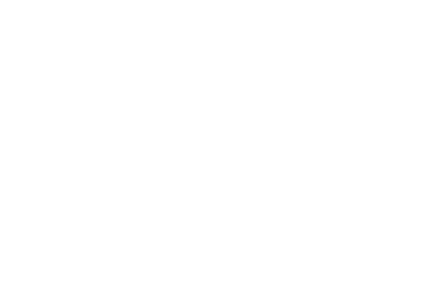

In [73]:
#nx.draw_networkx_edge_labels(network, pos=pos, edge_labels=a)
nx.draw(network, with_labels=True,pos=pos )
plt.show()